In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [9]:
diabetes = load_diabetes()

In [10]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [11]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [18]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [17]:
df['target']=diabetes.target

In [19]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [20]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: xlabel='sex', ylabel='target'>

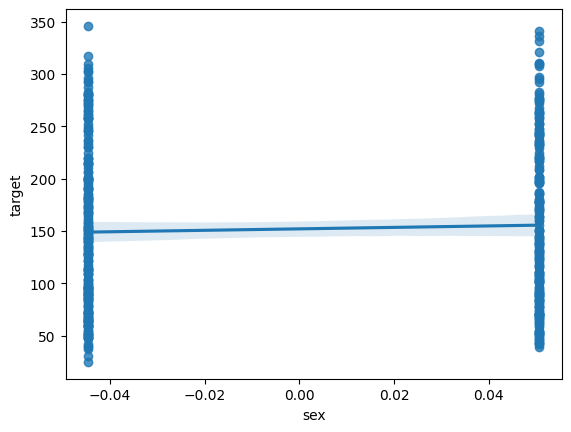

In [25]:
import seaborn as sns
sns.regplot(x='sex',y='target',data=df)

In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MODEL TRAINNING

In [32]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [34]:
regression.fit(X_train,y_train)

LinearRegression()

In [35]:
regression.coef_

array([ -2.67361921, -11.64349107,  24.75363013,  16.89151776,
       -62.09624273,  42.85417029,  15.80970633,   6.61120794,
        46.62244246,   3.58039579])

In [36]:
regression.intercept_

149.5210355987055

In [39]:
reg_pred=regression.predict(X_test)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

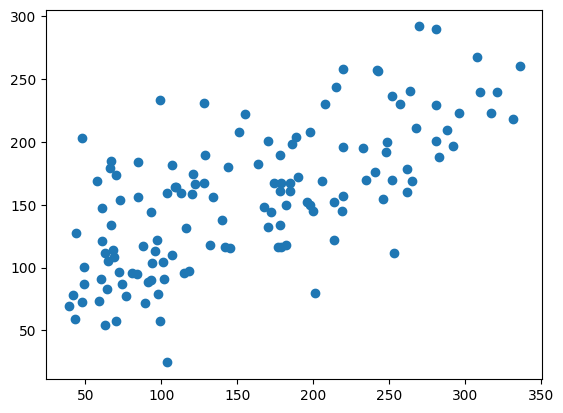

In [42]:
plt.scatter(y_test,reg_pred)

In [43]:
error = y_test-reg_pred

In [44]:
error

148   -17.069401
408   -15.129594
214   -39.972172
67    -24.781122
241    60.580611
         ...    
178   -14.960441
307    27.498836
385    74.045319
59     37.721954
276    94.653148
Name: target, Length: 133, dtype: float64

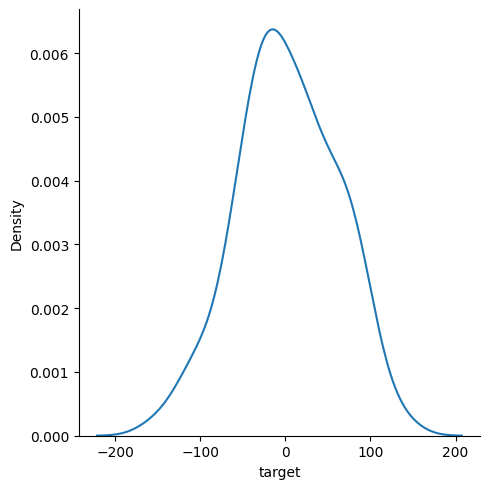

In [46]:
sns.displot(error,kind="kde")

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))
print(mean_squared_error(y_test,reg_pred))

47.4000778666955
58.16683246704865
3383.380399249705


In [52]:
regression.predict(scaler.transform(diabetes.data[0].reshape(1,-1)))

C:\Users\muqee\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([208.25886086])

In [59]:
import pickle

In [60]:
pickle.dump(regression,open('diabetes.pkl','wb'))

In [61]:
pkl_load = pickle.load(open('diabetes.pkl','rb'))

In [62]:
pkl_load.predict(scaler.transform(diabetes.data[0].reshape(1,-1)))

C:\Users\muqee\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([208.25886086])